In [103]:
import pandas as pd
import numpy as np

In [3]:
d={"ID":[1,2,3,4,5],"Name":["a","b","c","d","e"]}
df=pd.DataFrame(d)
df

,ID,Name
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e


### Dataframe Iteration

iteritems()

iterrows()

itertuples()

In [5]:
for key,value in df.iteritems():
    print(key)
    print(value)

ID
0    1
1    2
2    3
3    4
4    5
Name: ID, dtype: int64
Name
0    a
1    b
2    c
3    d
4    e
Name: Name, dtype: object


In [7]:
for row_index,row_data in df.iterrows():
    print("index:",row_index)
    print(row_data)

index: 0
ID      1
Name    a
Name: 0, dtype: object
index: 1
ID      2
Name    b
Name: 1, dtype: object
index: 2
ID      3
Name    c
Name: 2, dtype: object
index: 3
ID      4
Name    d
Name: 3, dtype: object
index: 4
ID      5
Name    e
Name: 4, dtype: object


In [8]:
for row in df.itertuples():
    print(row)

Pandas(Index=0, ID=1, Name='a')
Pandas(Index=1, ID=2, Name='b')
Pandas(Index=2, ID=3, Name='c')
Pandas(Index=3, ID=4, Name='d')
Pandas(Index=4, ID=5, Name='e')


### Pandas Group by

In [9]:
df=pd.read_csv("../Data/Teams.csv")
df

,Points,Rank,Team,Year
0,876,1,Riders,2014
1,789,2,Riders,2015
2,863,2,Devils,2014
3,673,3,Devils,2015
4,741,3,Kings,2014
5,812,4,Kings,2015
6,756,1,Kings,2016
7,788,1,Kings,2017
8,694,2,Riders,2016
9,701,4,Royals,2014


In [10]:
# Grouping data using team 
team=df.groupby("Team")
team

In [11]:
team.groups # Group_name: list of row index of items inside that group

{'Devils': [2, 3], 'Kings': [4, 5, 6, 7], 'Riders': [0, 1, 8, 11], 'Royals': [9, 10]}

In [12]:
#getting devils data
devils=team.get_group("Devils")
devils

,Points,Rank,Team,Year
2,863,2,Devils,2014
3,673,3,Devils,2015


In [13]:
team["Points"].mean() #Average points of all the teams

Team
Devils    768.00
Kings     774.25
Riders    762.25
Royals    752.50
Name: Points, dtype: float64

In [17]:
team["Points"].max() #Max points of all the teams

Team
Devils    863
Kings     812
Riders    876
Royals    804
Name: Points, dtype: int64

In [18]:
team.count() #count

,Points,Rank,Year
Team,,,
Devils,2,2,2
Kings,4,4,4
Riders,4,4,4
Royals,2,2,2


In [21]:
team.describe()

Points                                                           Rank  \
        count    mean         std    min     25%    50%     75%    max count   
Team                                                                           
Devils    2.0  768.00  134.350288  673.0  720.50  768.0  815.50  863.0   2.0   
Kings     4.0  774.25   31.899582  741.0  752.25  772.0  794.00  812.0   4.0   
Riders    4.0  762.25   88.567771  690.0  693.00  741.5  810.75  876.0   4.0   
Royals    2.0  752.50   72.831998  701.0  726.75  752.5  778.25  804.0   2.0   

              ...             Year                                             \
        mean  ...   75%  max count    mean       std     min      25%     50%   
Team          ...                                                               
Devils  2.50  ...  2.75  3.0   2.0  2014.5  0.707107  2014.0  2014.25  2014.5   
Kings   2.25  ...  3.25  4.0   4.0  2015.5  1.290994  2014.0  2014.75  2015.5   
Riders  1.75  ...  2.00  2.0   4.0  2015.5  1.290994  2014.0  2014.75  2015.5   
Royals  2.50  ...  3.25  4.0   2.0  2014.5  0.707107  2014.0  2014.25  2014.5   

                         
            75%     max  
Team                     
Devils  2014.75  2015.0  
Kings   2016.25  2017.0  
Riders  2016.25  2017.0  
Royals  2014.75  2015.0  

[4 rows x 24 columns]

1. Group by the team and display all teams

In [23]:
team.get_group("Devils")
team.get_group("Kings")
team.get_group("Riders")
team.get_group("Royals")

,Points,Rank,Team,Year
9,701,4,Royals,2014
10,804,1,Royals,2015


2. Print all Riders teams Details

In [24]:
team.get_group("Riders")

,Points,Rank,Team,Year
0,876,1,Riders,2014
1,789,2,Riders,2015
8,694,2,Riders,2016
11,690,2,Riders,2017


3. Print The maximum Points of Year 2014

In [26]:
year=df.groupby("Year")
year.get_group(2014)["Points"].max()

876

4. Print all rank 1 teams

In [28]:
Rank=df.groupby("Rank")
Rank.get_group(1)["Team"]

0     Riders
6      Kings
7      Kings
10    Royals
Name: Team, dtype: object

5. Print Each Teams Highest Points

In [30]:
team["Points"].max()

Team
Devils    863
Kings     812
Riders    876
Royals    804
Name: Points, dtype: int64

6. Print Each Teams average Points

In [31]:
team["Points"].mean()

Team
Devils    768.00
Kings     774.25
Riders    762.25
Royals    752.50
Name: Points, dtype: float64

### Filtering data and Selection

In [32]:
#dataframe[condition]
#get data of year 2015
df[df["Year"]==2015]

,Points,Rank,Team,Year
1,789,2,Riders,2015
3,673,3,Devils,2015
5,812,4,Kings,2015
10,804,1,Royals,2015


In [33]:
#multiple conditions
#df[(condition 1) & ,| (condition 2)]
#get the team from 2014 which having rank 1
df[(df["Year"]==2014) & (df["Rank"]==1)]

,Points,Rank,Team,Year
0,876,1,Riders,2014


In [36]:
# Get Highest Score Team Details
df[df["Points"]==df["Points"].max()]

,Points,Rank,Team,Year
0,876,1,Riders,2014


In [37]:
df["Rank"].value_counts()

2    4
1    4
4    2
3    2
Name: Rank, dtype: int64

In [38]:
df["Team"].value_counts()

Kings     4
Riders    4
Royals    2
Devils    2
Name: Team, dtype: int64

### Missing Values

In [55]:
df=pd.read_csv("Data.csv")

In [40]:
df

,Roll_no,Name,division,marks
0,1,alex,NaN,15.0
1,2,NaN,B,NaN
2,3,max,A,10.0
3,4,NaN,B,11.0
4,5,rose,A,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Roll_no   5 non-null      int64  
 1   Name      3 non-null      object 
 2   division  4 non-null      object 
 3   marks     3 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 288.0+ bytes


In [42]:
df.isna()

,Roll_no,Name,division,marks
0,False,False,True,False
1,False,True,False,True
2,False,False,False,False
3,False,True,False,False
4,False,False,False,True


In [43]:
df.isna().sum()

Roll_no     0
Name        2
division    1
marks       2
dtype: int64

### 1. Remove all rows containing NaN


In [46]:
df.dropna(inplace=True)

In [47]:
df

,Roll_no,Name,division,marks
2,3,max,A,10.0


### 2. Replacing NaN with mean,median,mode

In [49]:
#df.fillna(value)
#Fill Nan from marks with mean
df["marks"]=df["marks"].fillna(df["marks"].mean())
df

,Roll_no,Name,division,marks
0,1,alex,NaN,15.0
1,2,NaN,B,12.0
2,3,max,A,10.0
3,4,NaN,B,11.0
4,5,rose,A,12.0


In [52]:
mode_div=df["division"].mode()[0]

In [53]:
#Filling Division Nan with mode
df["division"]=df["division"].fillna(mode_div)
df

,Roll_no,Name,division,marks
0,1,alex,A,15.0
1,2,NaN,B,12.0
2,3,max,A,10.0
3,4,NaN,B,11.0
4,5,rose,A,12.0


In [54]:
df["Name"]=df["Name"].fillna("Unknown")
df

,Roll_no,Name,division,marks
0,1,alex,A,15.0
1,2,Unknown,B,12.0
2,3,max,A,10.0
3,4,Unknown,B,11.0
4,5,rose,A,12.0


### Forward Fill and Backword Fill 

In [56]:
df

,Roll_no,Name,division,marks
0,1,alex,NaN,15.0
1,2,NaN,B,NaN
2,3,max,A,10.0
3,4,NaN,B,11.0
4,5,rose,A,NaN


In [60]:
#Forword Fill(pad/fill)
df=df.fillna(method='pad')
df

,Roll_no,Name,division,marks
0,1,alex,NaN,15.0
1,2,alex,B,15.0
2,3,max,A,10.0
3,4,max,B,11.0
4,5,rose,A,11.0


In [61]:
#Backword Fill(bfill/backfill)
df=df.fillna(method='bfill')
df

,Roll_no,Name,division,marks
0,1,alex,B,15.0
1,2,alex,B,15.0
2,3,max,A,10.0
3,4,max,B,11.0
4,5,rose,A,11.0


In [62]:
df.isna().sum()

Roll_no     0
Name        0
division    0
marks       0
dtype: int64

#### Replace

In [63]:
#df.replace({"old_val": "new_val"})
df["Name"]=df["Name"].replace({'max':"jae"})
df

,Roll_no,Name,division,marks
0,1,alex,B,15.0
1,2,alex,B,15.0
2,3,jae,A,10.0
3,4,jae,B,11.0
4,5,rose,A,11.0


### Merging and Concatenation of Dataframe

In [68]:
d1={"id":[1,2,3,4,5],"name":["a","b","c","d","e"]}
df1=pd.DataFrame(d1)
df1

,id,name
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e


In [67]:
d2={"id":[1,2,3,4,5],"marks":[34,56,32,59,45]}
df2=pd.DataFrame(d2)
df2

,id,marks
0,1,34
1,2,56
2,3,32
3,4,59
4,5,45


### pd.merge

In [71]:
#df.merge(df1,df2,on="column_name")
df3=pd.merge(df1,df2,on="id")
df3

,id,name,marks
0,1,a,34
1,2,b,56
2,3,c,32
3,4,d,59
4,5,e,45


### pd.concat

In [72]:
cd1={"id":[1,2,3],"name":["a","b","c"]}
cdf1=pd.DataFrame(cd1)
cdf1

,id,name
0,1,a
1,2,b
2,3,c


In [73]:
cd2={"id":[4,5],"name":["d","e"]}
cdf2=pd.DataFrame(cd2)
cdf2

,id,name
0,4,d
1,5,e


In [75]:
pd.concat([cdf1,cdf2],keys=["df1","df2"])

id name
df1 0   1    a
    1   2    b
    2   3    c
df2 0   4    d
    1   5    e

In [76]:
pd.concat([df1,df2],keys=["df1","df2"])

id name  marks
df1 0   1    a    NaN
    1   2    b    NaN
    2   3    c    NaN
    3   4    d    NaN
    4   5    e    NaN
df2 0   1  NaN   34.0
    1   2  NaN   56.0
    2   3  NaN   32.0
    3   4  NaN   59.0
    4   5  NaN   45.0

### Apply Function

In [77]:
df=pd.read_csv('../Data/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,NaN,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         880 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name            11
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [84]:
# dropping Cabin due to large no. of missing values
df=df.drop(columns=["Cabin"])

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,NaN,female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [86]:
df["Name"]=df["Name"].fillna("U") #replacing missing values with unknown

In [87]:
df["Age"].mean()

29.69911764705882

In [88]:
df["Age"].median()

28.0

In [89]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [94]:
mode_em=df["Embarked"].mode()[0]

In [95]:
df["Embarked"]=df["Embarked"].fillna(mode_em)

In [96]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [98]:
def survive_label(val):
    if val==1:
        return "Alive"
    else:
        return "Dead"

In [99]:
df["label_survived"]=df["Survived"].apply(survive_label)
df["label_survived"]

0       Dead
1      Alive
2      Alive
3      Alive
4       Dead
       ...  
886     Dead
887    Alive
888     Dead
889    Alive
890     Dead
Name: label_survived, Length: 891, dtype: object

In [101]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,label_survived
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Dead
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Alive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Alive
3,4,1,1,U,female,35.0,1,0,113803,53.1000,S,Alive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Dead


In [102]:
def clean_price(val):
    return int(val.replace("$",""))

clean_price("$134")

134

In [104]:
df["Pclass"].apply(np.sin)

0      0.141120
1      0.841471
2      0.141120
3      0.841471
4      0.141120
         ...   
886    0.909297
887    0.841471
888    0.141120
889    0.841471
890    0.141120
Name: Pclass, Length: 891, dtype: float64

### Aggregations

In [106]:
df.aggregate([np.mean,np.median])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
mean,446.0,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
median,446.0,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200


In [107]:
df.aggregate({"Age":np.mean,"Pclass":np.sum})

Age         29.361582
Pclass    2057.000000
dtype: float64

### Working with Text in Pandas

In [110]:
#lower case
df.Name.str.lower()

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3                                                      u
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

In [111]:
#Upper Case
df.Name.str.upper()

0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3                                                      U
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

In [113]:
#String Length
df["Name"].str.len()

0      23
1      51
2      22
3       1
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [114]:
# Strip
df["Name"].str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3                                                      U
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [115]:
# split
df["Name"].str.split(" ")

0                           [Braund,, Mr., Owen, Harris]
1      [Cumings,, Mrs., John, Bradley, (Florence, Bri...
2                             [Heikkinen,, Miss., Laina]
3                                                    [U]
4                          [Allen,, Mr., William, Henry]
                             ...                        
886                            [Montvila,, Rev., Juozas]
887                    [Graham,, Miss., Margaret, Edith]
888       [Johnston,, Miss., Catherine, Helen, "Carrie"]
889                           [Behr,, Mr., Karl, Howell]
890                              [Dooley,, Mr., Patrick]
Name: Name, Length: 891, dtype: object

In [117]:
#cat
df["Name"].str.cat(sep="_")

'Braund, Mr. Owen Harris_Cumings, Mrs. John Bradley (Florence Briggs Thayer)_Heikkinen, Miss. Laina_U_Allen, Mr. William Henry_Moran, Mr. James_McCarthy, Mr. Timothy J_Palsson, Master. Gosta Leonard_Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)_Nasser, Mrs. Nicholas (Adele Achem)_Sandstrom, Miss. Marguerite Rut_Bonnell, Miss. Elizabeth_Saundercock, Mr. William Henry_Andersson, Mr. Anders Johan_Vestrom, Miss. Hulda Amanda Adolfina_Hewlett, Mrs. (Mary D Kingcome) _Rice, Master. Eugene_Williams, Mr. Charles Eugene_Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)_Masselmani, Mrs. Fatima_Fynney, Mr. Joseph J_Beesley, Mr. Lawrence_McGowan, Miss. Anna "Annie"_Sloper, Mr. William Thompson_Palsson, Miss. Torborg Danira_U_Emir, Mr. Farred Chehab_Fortune, Mr. Charles Alexander_O\'Dwyer, Miss. Ellen "Nellie"_Todoroff, Mr. Lalio_Uruchurtu, Don. Manuel E_Spencer, Mrs. William Augustus (Marie Eugenie)_Glynn, Miss. Mary Agatha_Wheadon, Mr. Edward H_Meyer, Mr. Edgar Joseph_Holverson, Mr. Ale

In [118]:
df["Name"].str.get_dummies()

,"Abbing, Mr. Anthony","Abbott, Mr. Rossmore Edward","Abbott, Mrs. Stanton (Rosa Hunt)","Abelson, Mr. Samuel","Abelson, Mrs. Samuel (Hannah Wizosky)","Adahl, Mr. Mauritz Nils Martin","Adams, Mr. John","Ahlin, Mrs. Johan (Johanna Persdotter Larsson)","Aks, Mrs. Sam (Leah Rosen)","Albimona, Mr. Nassef Cassem",...,"Yrois, Miss. Henriette (""Mrs Harbeck"")","Zabour, Miss. Hileni","Zabour, Miss. Thamine","Zimmerman, Mr. Leo","de Messemaeker, Mrs. Guillaume Joseph (Emma)","de Mulder, Mr. Theodore","de Pelsmaeker, Mr. Alfons","del Carlo, Mr. Sebastiano","van Billiard, Mr. Austin Blyler","van Melkebeke, Mr. Philemon"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
889,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
#contains
df["Name"].str.contains('a')

0       True
1       True
2       True
3      False
4       True
       ...  
886     True
887     True
888     True
889     True
890     True
Name: Name, Length: 891, dtype: bool

In [120]:
df["Name"].str.replace('Miss','Ms')

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                   Heikkinen, Ms. Laina
3                                                      U
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                           Graham, Ms. Margaret Edith
888               Johnston, Ms. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [121]:
df["Name"].str.repeat(2)

0         Braund, Mr. Owen HarrisBraund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2           Heikkinen, Miss. LainaHeikkinen, Miss. Laina
3                                                     UU
4       Allen, Mr. William HenryAllen, Mr. William Henry
                             ...                        
886           Montvila, Rev. JuozasMontvila, Rev. Juozas
887    Graham, Miss. Margaret EdithGraham, Miss. Marg...
888    Johnston, Miss. Catherine Helen "Carrie"Johnst...
889           Behr, Mr. Karl HowellBehr, Mr. Karl Howell
890               Dooley, Mr. PatrickDooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [124]:
df["Name"].str.count('Mrs')

0      0
1      1
2      0
3      0
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Name, Length: 891, dtype: int64

In [127]:
df["Name"][df["Name"].str.endswith('e')]

16                         Rice, Master. Eugene
17                 Williams, Mr. Charles Eugene
21                        Beesley, Mr. Lawrence
43     Laroche, Miss. Simonne Marie Anne Andree
61                          Icard, Miss. Amelie
                         ...                   
822             Reuchlin, Jonkheer. John George
827                       Mallet, Master. Andre
834                      Allum, Mr. Owen George
837                         Sirota, Mr. Maurice
839                        Marechal, Mr. Pierre
Name: Name, Length: 75, dtype: object

In [128]:
df["Name"].str.find('Mrs') #-1 no such pattern is found

0     -1
1      9
2     -1
3     -1
4     -1
      ..
886   -1
887   -1
888   -1
889   -1
890   -1
Name: Name, Length: 891, dtype: int64

### Pandas Visualization

<AxesSubplot:>

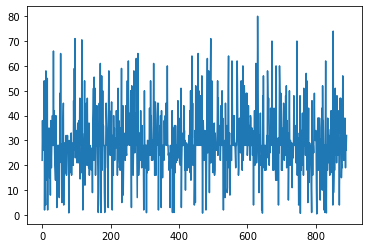

In [130]:
df.Age.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

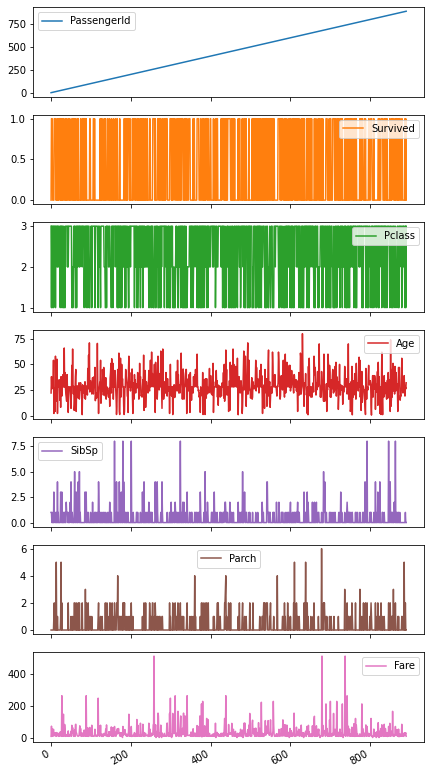

In [133]:
df.plot(subplots=True,figsize=(7,15))

<AxesSubplot:>

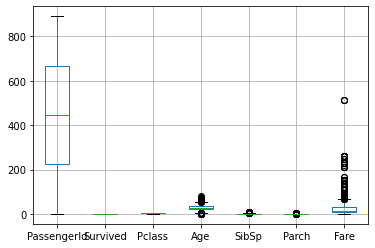

In [134]:
df.boxplot()

<AxesSubplot:>

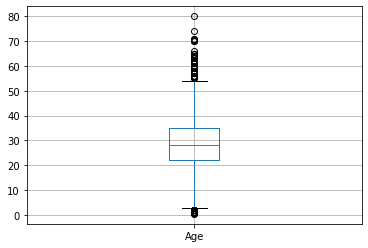

In [137]:
df[["Age"]].boxplot()

<AxesSubplot:>

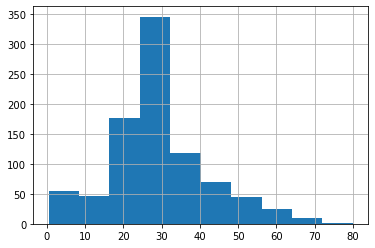

In [138]:
df["Age"].hist()

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

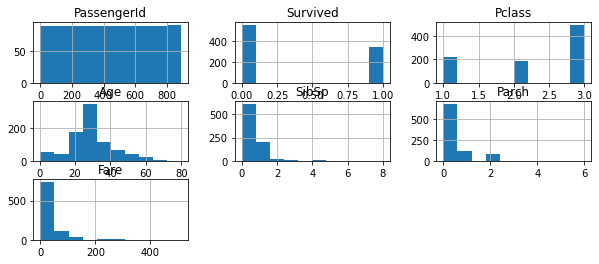

In [140]:
df.hist(figsize=(10,4))

<AxesSubplot:>

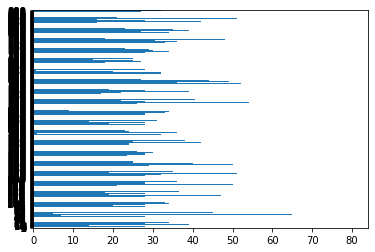

In [144]:
df.Age.plot(kind='barh')

<AxesSubplot:ylabel='Density'>

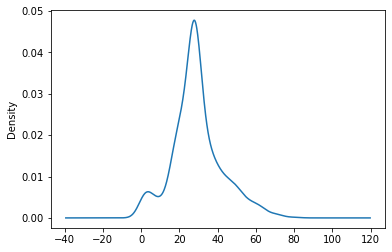

In [146]:
df["Age"].plot(kind='kde')